In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_mem = pd.read_csv("data/member.csv")
df_trans = pd.read_csv("data/transaction.csv")

In [3]:
print(df_mem.shape)
df_mem.head(10)

(64000, 6)


,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0
5,612635,6,Surburban,0,Phone,1
6,872298,9,Surburban,1,Phone,0
7,103308,9,Urban,0,Phone,0
8,283516,9,Rural,1,Phone,0
9,101354,10,Urban,1,Web,0


In [5]:
df_mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [6]:
print(df_trans.shape)
df_trans.head(10)

(196836, 3)


,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000
5,394235,4,8000
6,130152,2,11000
7,130152,1,22000
8,130152,1,23000
9,130152,3,27000


In [16]:
#👉 고유값(중복을 제외한 서로 다른 값)의 개수를 세는 함수야. ✅ 결과:👉 값은 1, 2, 3,3,3,3 → 총 3개 (중복 제거) 중복아이디 삭제
df_trans['id'].nunique()

64000

# 탐색적 데이터 분석

In [17]:
# 👉 df_mem 데이터프레임의 recency 컬럼에 대한 .describe() 기본 통계 요약을 보여주는 명령어야.
df_mem['recency'].describe()

count    64000.000000
mean         5.763734
std          3.507592
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: recency, dtype: float64

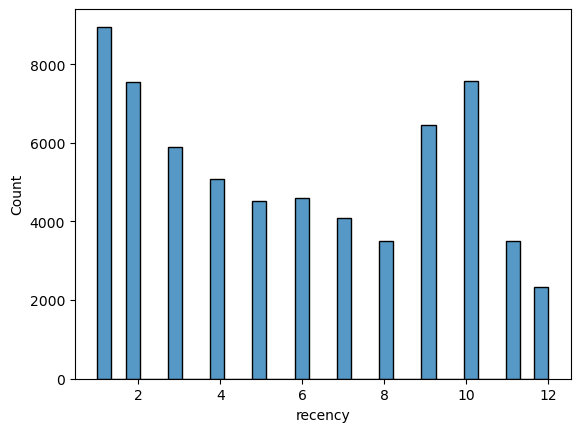

In [18]:
sns.histplot(df_mem, x='recency');

## 아이템 별 평균가격 추가

In [19]:
# #👉 새로운 컬럼 avg_price (평균 단가) 를 만드는 코드야.

# 계산식은: 평균단가=평균단가=총금액(total_amount)÷구매수량(num_item)
# 즉,
# total_amount → 총 결제 금액
# num_item → 구매한 상품 개수
# avg_price → 상품 1개당 평균 가격

df_trans['avg_price'] = df_trans['total_amount'] / df_trans['num_item']
df_trans

,id,num_item,total_amount,avg_price
0,906145,5,34000,6800.000000
1,906145,1,27000,27000.000000
2,906145,4,33000,8250.000000
3,184478,4,29000,7250.000000
4,394235,4,33000,8250.000000
...,...,...,...,...
196831,536246,5,24000,4800.000000
196832,927617,5,26000,5200.000000
196833,927617,3,22000,7333.333333
196834,927617,3,18000,6000.000000


In [20]:
# 고객 별 평균 거래 데이터
#1️⃣ groupby('id')👉 id 기준으로 데이터를 묶는 것 보통 id는 고객 ID 인 경우가 많아.
#2️⃣ .mean()👉 각 그룹별 평균값 계산숫자형 컬럼들에 대해 평균을 구함.
trans_mean = df_trans.groupby('id').mean()
trans_mean

,num_item,total_amount,avg_price
id,,,
100001,3.500000,26000.000000,7500.000000
100008,5.000000,26000.000000,5200.000000
100032,2.666667,20666.666667,9366.666667
100036,3.000000,25800.000000,13273.333333
100070,3.250000,21250.000000,8537.500000
...,...,...,...
999932,5.000000,32000.000000,6400.000000
999981,2.000000,22750.000000,12875.000000
999990,3.000000,28000.000000,10388.888889


In [21]:
# ID별 거래 건수 확인 
#.value_counts() 는👉 각 값이 몇 번씩 나왔는지 개수를 세는 함수야.
trans_cnt = df_trans['id'].value_counts()
trans_cnt

id
691067    5
720147    5
422265    5
670720    5
154620    5
         ..
881780    1
154471    1
480462    1
126129    1
156423    1
Name: count, Length: 64000, dtype: int64

In [22]:
# concat으로 두 데이터 결합
trans_df = pd.concat([trans_mean, trans_cnt], axis=1)
trans_df

,num_item,total_amount,avg_price,count
id,,,,
100001,3.500000,26000.000000,7500.000000,2
100008,5.000000,26000.000000,5200.000000,1
100032,2.666667,20666.666667,9366.666667,3
100036,3.000000,25800.000000,13273.333333,5
100070,3.250000,21250.000000,8537.500000,4
...,...,...,...,...
999932,5.000000,32000.000000,6400.000000,1
999981,2.000000,22750.000000,12875.000000,4
999990,3.000000,28000.000000,10388.888889,3


In [26]:
# df_mem.reset_index(inplace=True)

In [25]:
# df_mem 데이터의 id를 인덱스로 변경
# set_index('id') 의미👉 'id' 컬럼을 인덱스(index) 로 설정하는 거야.
#inplace=True 👉 “원본 데이터를 바로 수정하겠다” 는 뜻이야. (인플레이스)

df_mem.set_index('id', inplace=True)
df_mem

KeyError: "None of ['id'] are in the columns"

In [26]:
# join을 통해 고객별 기본정보와 거래 정보를 합치기
# 📌 코드 의미👉 df_mem을 기준으로 trans_df를 옆으로 붙이는 것 (열 방향 결합) 이야.
# 즉, 인덱스를 기준으로 합치는 join이야.
df = df_mem.join(trans_df)
df

,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,avg_price,count
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,3.333333,31333.333333,14016.666667,3
184478,6,Rural,1,Web,0,4.000000,29000.000000,7250.000000,1
394235,7,Surburban,1,Web,0,4.000000,20500.000000,5125.000000,2
130152,9,Rural,1,Web,0,1.750000,20750.000000,14875.000000,4
940352,2,Urban,0,Web,0,3.000000,31000.000000,10333.333333,1
...,...,...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,3.500000,26000.000000,8012.500000,4
547316,5,Urban,1,Phone,0,1.800000,17800.000000,11300.000000,5
131575,6,Urban,1,Phone,0,4.000000,30500.000000,7833.333333,2


# 결측치 확인

In [27]:
df.isna().sum()

recency         0
zip_code        0
is_referral     0
channel         0
conversion      0
num_item        0
total_amount    0
avg_price       0
count           0
dtype: int64

# 데이터 탐색

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64000 entries, 906145 to 254229
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recency       64000 non-null  int64  
 1   zip_code      64000 non-null  object 
 2   is_referral   64000 non-null  int64  
 3   channel       64000 non-null  object 
 4   conversion    64000 non-null  int64  
 5   num_item      64000 non-null  float64
 6   total_amount  64000 non-null  float64
 7   avg_price     64000 non-null  float64
 8   count         64000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [29]:
# 범주형 변수들 리스트화
#📌 1️⃣ 범주형 변수 뜻범주형 변수 (Categorical Variable) 👉 숫자 계산용이 아니라👉 그룹/종류/카테고리 구분용 변수야.
#📌 2️⃣ 왜 리스트화 하냐면?이유 1️⃣ 한번에 처리하려고예를 들어 원핫인코딩 할 때:👉 범주형 변수만 한 번에 변환 가능
cat_list = ['recency', 'zip_code', 'is_referral', 'channel', 'conversion', 'count']
cat_list

['recency', 'zip_code', 'is_referral', 'channel', 'conversion', 'count']

In [30]:
# 카테고리형 변수들의 유니크값 별 카운트 
#for cat in cat_list: 👉 cat_list 안에 있는 변수들을 하나씩 꺼내서 반복하겠다 는 뜻이야.
for cat in cat_list:
    print(df[cat].value_counts())
    print("-------------------")

recency
1     8952
10    7565
2     7537
9     6441
3     5904
4     5077
6     4605
5     4510
7     4078
11    3504
8     3495
12    2332
Name: count, dtype: int64
-------------------
zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64
-------------------
is_referral
1    32144
0    31856
Name: count, dtype: int64
-------------------
channel
Web             28217
Phone           28021
Multichannel     7762
Name: count, dtype: int64
-------------------
conversion
0    54606
1     9394
Name: count, dtype: int64
-------------------
count
2    13356
3    13320
5    13295
4    13220
1    10809
Name: count, dtype: int64
-------------------


In [31]:
# conversion rate     
9394/(54606+9394)

0.14678125

In [32]:
print(df.shape)
df.head()

(64000, 9)


,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,avg_price,count
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,3.333333,31333.333333,14016.666667,3
184478,6,Rural,1,Web,0,4.000000,29000.000000,7250.000000,1
394235,7,Surburban,1,Web,0,4.000000,20500.000000,5125.000000,2
130152,9,Rural,1,Web,0,1.750000,20750.000000,14875.000000,4
940352,2,Urban,0,Web,0,3.000000,31000.000000,10333.333333,1


# Random Forest 분류 모델링

In [33]:
# 범주형 변수의 수치화(원핫 인코딩)
#pd.get_dummies(df)👉 범주형 변수를 자동으로 찾아서각 카테고리를 0/1 컬럼으로 변환해.
#dtype='int'👉 결과를 정수형(0,1) 으로 만들겠다는 뜻(기본은 True/False로 나올 수도 있음)
# drop_first=True ⭐ 중요👉 첫 번째 카테고리를 하나 삭제함. 
#왜냐하면… 완전 반대의 관계 컬럼있는 상태에서 회귀모델에 넣으면 다중공선성 문제가생겨 하나만 남김

df_dummies = pd.get_dummies(df, dtype='int', drop_first=True)
df_dummies

,recency,is_referral,conversion,num_item,total_amount,avg_price,count,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
id,,,,,,,,,,,
906145,10,0,0,3.333333,31333.333333,14016.666667,3,1,0,1,0
184478,6,1,0,4.000000,29000.000000,7250.000000,1,0,0,0,1
394235,7,1,0,4.000000,20500.000000,5125.000000,2,1,0,0,1
130152,9,1,0,1.750000,20750.000000,14875.000000,4,0,0,0,1
940352,2,0,0,3.000000,31000.000000,10333.333333,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
838295,10,0,0,3.500000,26000.000000,8012.500000,4,0,1,0,1
547316,5,1,0,1.800000,17800.000000,11300.000000,5,0,1,1,0
131575,6,1,0,4.000000,30500.000000,7833.333333,2,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split #👉 데이터를 훈련용(train)과 테스트용(test)으로 나누는 함수를 불러오는코드야

In [36]:
# 데이터 x, y 분리    #conversion:전환
x = df_dummies.drop(columns=['conversion'])   # 독립변수, 설명변수,
y = df_dummies['conversion']   # 예측하고자 하는 대상, 종속변수, 타겟변수 

In [37]:
x

,recency,is_referral,num_item,total_amount,avg_price,count,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
id,,,,,,,,,,
906145,10,0,3.333333,31333.333333,14016.666667,3,1,0,1,0
184478,6,1,4.000000,29000.000000,7250.000000,1,0,0,0,1
394235,7,1,4.000000,20500.000000,5125.000000,2,1,0,0,1
130152,9,1,1.750000,20750.000000,14875.000000,4,0,0,0,1
940352,2,0,3.000000,31000.000000,10333.333333,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
838295,10,0,3.500000,26000.000000,8012.500000,4,0,1,0,1
547316,5,1,1.800000,17800.000000,11300.000000,5,0,1,1,0
131575,6,1,4.000000,30500.000000,7833.333333,2,0,1,1,0


In [38]:
# 학습, 테스트 데이터 분리 / 데이터를 학습용(train) 과 테스트용(test) 으로 나누는 코드야.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100, stratify=y) 
# test_size=0.3👉 전체 데이터의 30%를 테스트용으로 사용
#random_state=100👉 랜덤 분할을 항상 동일하게 유지하기 위한 고정값이걸 안 쓰면코드 실행할 때마다 데이터 분할이 달라질 수 있어.
# stratify=y : 클래스 비율에 맞게 학습, 테스트 데이터 분리 / ⭐ stratify=y (중요)👉 y(타겟)의 비율을 그대로 유지하면서 나눈다는 뜻

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(44800, 10)
(19200, 10)
(44800,)
(19200,)


In [41]:
#📌 의미👉 랜덤포레스트 분류 모델(Random Forest Classifier) 을 사용하기 위해 불러오는 코드야.
#Random Forest가 뭐냐면?👉 여러 개의 의사결정나무(Decision Tree) 를 만들어서👉 그 결과를 투표로 결정하는 모델이야.
from sklearn.ensemble import RandomForestClassifier

In [43]:
#📌 코드 의미👉 랜덤포레스트 모델을 생성(설정만)한 상태야.아직 학습(fit)은 안 한 단계야.
# max_depth=5 ⭐👉 각 트리(나무)의 최대 깊이를 5로 제한한다는 뜻.
# random_state=100👉 랜덤 결과를 고정하는 숫자.
model = RandomForestClassifier(max_depth = 5, random_state = 100)

In [44]:
# 모델 학습시키는 단계
# x_train → 문제지 (입력 데이터, 독립변수)
# y_train → 정답지 (타겟값, 종속변수)
#💡 한 줄 요약fit() =👉 모델이 데이터를 보고 패턴을 배우는 단계

model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 예측하고 평가하기

In [47]:
# test 데이터 예측하기  #📌 이 코드 의미👉 학습된 모델로 테스트 데이터(x_test)를 예측한 결과야.
# 🔎 동작 과정
# model.fit(x_train, y_train)
# → 모델이 학습 완료
# model.predict(x_test)
# → 학습한 규칙을 이용해서
# → x_test 데이터의 결과를 예측
# 결과를 y_pred에 저장

y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(19200,))

In [48]:
#📌 이 코드 의미👉 모델 성능을 평가하기 위한 평가지표 함수를 불러오는 코드야.
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
#1️⃣ accuracy_score🎯 정확도(Accuracy)  (애큐러시 스코어)

accuracy_score(y_test, y_pred) #👉 전체 중에서 몇 %를 맞췄는지 알려줌.

0.860625

In [50]:
# 혼동 행렬  //////  array👉 어레이 배열, 여러 값을 순서대로 담은 자료 구조
confusion_matrix(y_test, y_pred)

array([[16382,     0],
       [ 2676,   142]])

In [51]:
#📌 코드 의미👉 모델 예측 결과(y_pred)와 실제값(y_test)를 비교해서 다양한 성능 지표를 보여주는 함수야.
#classification_report는 정밀도, 재현율, F1 스코어 등 여러 지표를 한 번에 확인할 수 있어.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     16382
           1       1.00      0.05      0.10      2818

    accuracy                           0.86     19200
   macro avg       0.93      0.53      0.51     19200
weighted avg       0.88      0.86      0.80     19200



# GridSearchCV

In [82]:
# 최적의 성능을 내는 BEST 파라미터 조합 찾기
# GridSearchCV란?
# Grid Search + Cross Validation
# 쉽게 말하면, 여러 하이퍼파라미터 조합을 모두 시험해보고 가장 성능 좋은 모델을 찾아주는 도구야

In [52]:
from sklearn.model_selection import GridSearchCV

In [56]:
# 📌 의미이 코드는 랜덤포레스트 모델(Random Forest Classifier)을 생성하는 코드야.
# 아직 학습(fit)은 안 한 상태야.학습할 때 사용할 하이퍼파라미터는 기본값으로 설정됨.
#random_state는 난수(random number)의 시드(seed) 를 고정하는 역할 (난수:무작위 생성된 숫자)
model = RandomForestClassifier(random_state=100)

In [57]:
#param_grid = 하이퍼파라미터 후보 딕셔너리 GridSearchCV가 이 조합들을 모두 시험하면서 모델 성능을 평가하게 돼.
#각 파라미터 의미
# 파라미터	후보 값	설명
# n_estimators	[100, 200]	나무(Decision Tree) 개수. 많을수록 안정적이지만 학습 느림
# max_depth	[None, 5, 10]	각 트리 최대 깊이 제한. None이면 제한 없음

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 3]
}
# GridSearchCV는 모든 조합을 시험함:
# n_estimators=100, max_depth=None
# n_estimators=100, max_depth=5
# n_estimators=100, max_depth=10
# n_estimators=200, max_depth=None
# n_estimators=200, max_depth=5
# n_estimators=200, max_depth=10
# 총 6개의 모델 성능 평가 → 최적 조합 선택

In [58]:
# 랜덤포레스트 모델을 가지고 있는 GridsearchCV 선언/GridSearchCV를 사용해서 랜덤포레스트 모델의 최적 하이퍼파라미터를 찾는 설정이야
# model → 우리가 생성한 RandomForestClassifier 모델
# param_grid → 시험할 하이퍼파라미터 후보 딕셔너리 (n_estimators, max_depth 등)
# cv=5 → 5-fold 교차검증으로 모델 성능 평가
# scoring='accuracy' → 정확도 기준으로 최적 모델 선택
#n_jobs=-1 → CPU 코어 모두 사용 → 속도 향상

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,                   # 교차검증(cross validation)
    scoring='accuracy',     # roc_auc, accuracy
    n_jobs=-1 
)

In [59]:
#%%time 의미Jupyter Notebook 전용 매직 명령어 %%time
#grid.fit(x_train, y_train) 의미grid → 아까 만든 GridSearchCV 객체fit() → 학습 시작
grid.fit(x_train, y_train)

CPU times: total: 5.72 s
Wall time: 30.4 s


,estimator,RandomForestC...dom_state=100)
,param_grid,"{'max_depth': [None, 5, ...], 'n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [61]:
# 그리드서치 결과
#grid.cv_results_ → GridSearchCV가 모든 하이퍼파라미터 조합에 대해 수행한 교차검증 결과를 딕셔너리 형태로 저장
#pd.DataFrame() → 보기 쉽게 DataFrame으로 변환

results = pd.DataFrame(grid.cv_results_)

# 주요 컬럼만 보기
cols = [
    'params',                 # 하이퍼파라미터 조합
    'mean_test_score',        # 교차검증 평균 점수
    'std_test_score',         # 표준편차
    'rank_test_score'         # 점수 순위 (1 = 최고)
]
#cols = columns즉, 열(column, 컬럼)들을 의미하는 변수 이름
results[cols].sort_values('rank_test_score').head(10)

# 동작 과정
# GridSearchCV 수행 후 각 하이퍼파라미터 조합별 점수 기록
# DataFrame으로 변환 → 보기 편하게
# sort_values('rank_test_score') → 성능이 높은 순으로 정렬
# head(10) → 상위 10개 후보 확인

,params,mean_test_score,std_test_score,rank_test_score
5,"{'max_depth': 10, 'n_estimators': 200}",0.870134,0.000778,1
4,"{'max_depth': 10, 'n_estimators': 100}",0.870000,0.001135,2
1,"{'max_depth': None, 'n_estimators': 200}",0.869933,0.001161,3
0,"{'max_depth': None, 'n_estimators': 100}",0.869531,0.001153,4
2,"{'max_depth': 5, 'n_estimators': 100}",0.859330,0.000679,5
3,"{'max_depth': 5, 'n_estimators': 200}",0.859308,0.000642,6


In [73]:
# 최적의 파라미터를 가진 모델
# 📌 코드 의미이 코드는 랜덤포레스트 모델(Random Forest Classifier)을 생성하는 코드야.
# 이미 GridSearchCV나 다른 실험에서 좋은 성능을 보여준 하이퍼파라미터 조합을 직접 지정한 상태야.
# 아직 학습(fit)은 하지 않은 상태.

# 🔎 파라미터 하나씩
# 파라미터	값	의미
# random_state	100	랜덤 선택 고정 → 실행할 때마다 같은 결과 재현 가능
# max_depth	10	각 트리의 최대 깊이를 10으로 제한 → 과적합 방지
# n_estimators	200	트리 200개 생성 → 안정적 예측 가능

model = RandomForestClassifier(random_state=100, max_depth= 10, n_estimators= 200)
model

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
# 모델 학습 => best model
model.fit(x_train, y_train)
model

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
# test 데이터 예측하기
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(19200,))

In [67]:
# 테스트 정확도 측정
accuracy_score(y_test, y_pred)

0.871875

In [68]:
# predict는 확률값을 0 or 1로 바꾼 것  predict →예측하다 (프리딕트)
#pred = model.predict(x_test) 학습된 랜덤포레스트 모델로 테스트 데이터를 예측결과를 pred에 저장
pred = model.predict(x_test)              # 클래스 예측
pred[:31]
#pred[:31]슬라이싱(slicing)pred 배열의 처음 31개 값만 확인

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1])

In [69]:
# predict_proba : 확률로 예측 
# predict_proba 예측 확률(prediction probability) 을 반환하는 함수
# 모델이 각 클래스에 속할 확률을 숫자로 알려줌
# predict()는 최종 클래스 하나만 알려주지만,
# predict_proba()는 각 클래스별 가능성까지 보여줌

# [:, 1]의미
# : → 모든 행(row)을 선택
# 1 → 1번 열(column)만 선택
# 따라서 [:, 1] = 모든 행의 두 번째 열
# 💡 파이썬에서 인덱스는 0부터 시작
# 0 → 첫 번째 열  1 → 두 번째 열

prob = model.predict_proba(x_test)[:, 1]   # 전환 확률
prob[:31]

array([0.09654063, 0.29745033, 0.16337514, 0.10718211, 0.00058021,
       0.09713056, 0.11044234, 0.31020979, 0.00150188, 0.05275859,
       0.17172703, 0.00182648, 0.14725272, 0.31855377, 0.22763638,
       0.00405707, 0.09214017, 0.33287429, 0.2010396 , 0.12318157,
       0.10533892, 0.13982297, 0.11432131, 0.11095662, 0.01057189,
       0.47652723, 0.1367375 , 0.00828451, 0.18204768, 0.00752019,
       0.57960616])

# 중요 변수 파악

In [70]:
# 중요도 확인
importances = model.feature_importances_
importances

array([0.05200403, 0.02655167, 0.37223718, 0.1557453 , 0.16845878,
       0.19091447, 0.0077868 , 0.00681587, 0.01261792, 0.00686797])

In [71]:
# 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance_df

,feature,importance
2,num_item,0.372237
5,count,0.190914
4,avg_price,0.168459
3,total_amount,0.155745
0,recency,0.052004
1,is_referral,0.026552
8,channel_Phone,0.012618
6,zip_code_Surburban,0.007787
9,channel_Web,0.006868
7,zip_code_Urban,0.006816


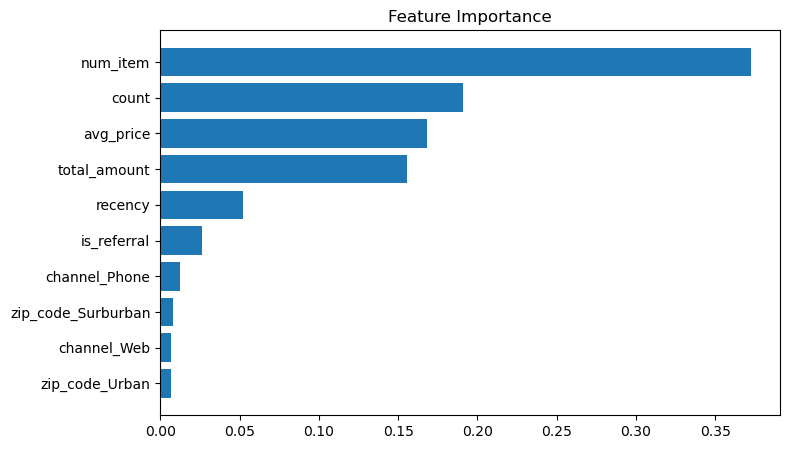

In [72]:
# 데이터프레임을 bar 차트 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
# 수평 바차트
plt.barh(feature_importance_df['feature'],
         feature_importance_df['importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.show()